# Walkthroughs

[Walkthroughs](https://pynbody.readthedocs.io/latest/tutorials/tutorials.html)

In [ ]:
# !brew install wget

In [ ]:
import subprocess
import shutil

# Check if wget is available
wget_path = shutil.which('wget')
if wget_path:
    print(f"wget found at: {wget_path}")
else:
    print("wget not found in PATH")
    
# Try running wget --version
try:
    result = subprocess.run(['wget', '--version'], capture_output=True, text=True)
    print("wget version output:")
    print(result.stdout[:200])  # First 200 characters
except FileNotFoundError:
    print("wget command not found")  

wget found at: /opt/homebrew/bin/wget
wget version output:
GNU Wget 1.25.0 built on darwin24.1.0.

-cares +digest -gpgme +https +ipv6 +iri +large-file -metalink +nls 
+ntlm +opie -psl +ssl/openssl 

Wgetrc: 
    /opt/homebrew/etc/wgetrc (system)
Locale: 
    


In [3]:
import pynbody.test_utils
pynbody.test_utils.precache_test_data()

--2025-06-17 11:30:25--  https://zenodo.org/record/15528615/files/swift.tar.gz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.45.92, 188.185.48.194
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/15528615/files/swift.tar.gz [following]
--2025-06-17 11:30:25--  https://zenodo.org/records/15528615/files/swift.tar.gz
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 45031558 (43M) [application/octet-stream]
Saving to: ‘swift.tar.gz’

     0K .......... .......... .......... .......... ..........  0%  214K 3m25s
    50K .......... .......... .......... .......... ..........  0%  464K 2m30s
   100K .......... .......... .......... .......... ..........  0% 13.1M 1m41s
   150K .......... .......... .......... .......... ..........  0%  434K 1m41s
   200K .......... .......... .......... .......... ..........  0%  4

## Quick Start

### Loading snapshots and halos

In [4]:
import pynbody
import pylab
s = pynbody.load('testdata/gasoline_ahf/g15784.lr.01024.gz') # s is SimSnap instance, handles loading snapshots, lazy loading

In [ ]:
h = s.halos() # h is a HaloCatalog instance
# s.halos(v1 something)

pynbody.halo : Unable to load AHF substructure file; continuing without. To expose the underlying problem as an exception, pass ignore_missing_substructure=False to the AHFCatalogue constructor


In [6]:
main_halo = h[0] # store first halo in main_halo, NOTE: halo numbers can be random

In [7]:
print('ngas = %e, ndark = %e, nstar = %e\n'%(len(main_halo.gas),len(main_halo.dark),len(main_halo.star)))

ngas = 7.906000e+04, ndark = 1.610620e+05, nstar = 2.621780e+05



In [8]:
print('Whole snapshot ngas = %e, ndark = %e, nstar = %e\n'%(len(s.gas),len(s.dark),len(s.star)))
print('Halo 5 ngas = %e, ndark = %e, nstar = %e\n'%(len(h[5].gas),len(h[5].dark),len(h[5].star)))

Whole snapshot ngas = 1.587550e+05, ndark = 1.293231e+06, nstar = 2.651700e+05

Halo 5 ngas = 1.880000e+02, ndark = 1.009500e+04, nstar = 0.000000e+00



### Making some images

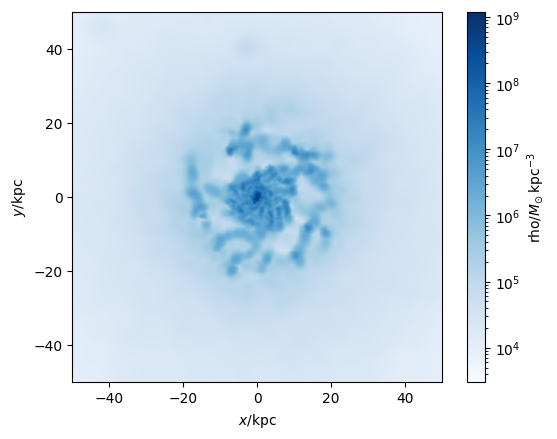

In [9]:
s.physical_units() # convert to kpc, Msun, km/s
pynbody.analysis.center(main_halo) # center on density peak of main halo
image_values = pynbody.plot.image(main_halo.gas, width=100, cmap='Blues')

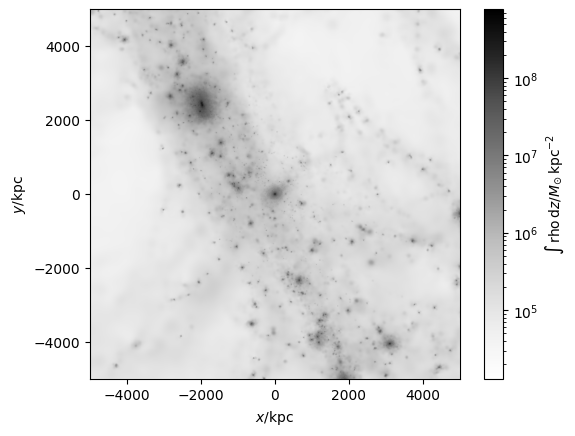

In [10]:
pynbody.plot.image(s.d[pynbody.filt.Sphere('10 Mpc')],
                   width='10 Mpc', units = 'Msol kpc^-2',
                   cmap='Greys')

### Aligning the snapshot

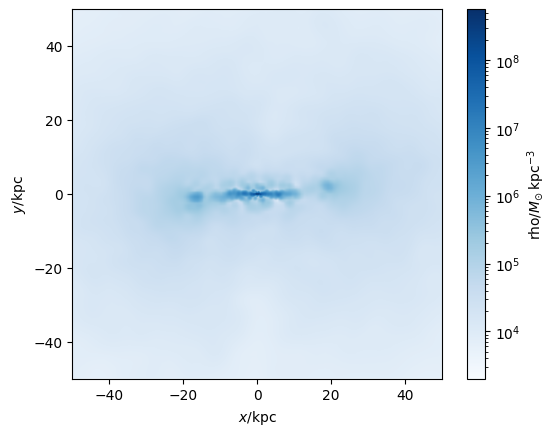

In [11]:
pynbody.analysis.sideon(main_halo) # side view such that angular momentum is parallel to y (faceon also exists)
pynbody.plot.image(main_halo.g, width=100, cmap='Blues');

### Quick-look at the data and units

In [12]:
s['pos']
s['pos'].units

Unit("kpc")

In [13]:
s.original_units()
s['pos']

SimArray([[-1.07099119e-02, -4.47846877e-02,  1.50024409e-03],
          [-1.00210843e-02, -4.46503609e-02, -2.44467632e-03],
          [-9.78725797e-03, -4.52261468e-02, -2.11442971e-03],
          ...,
          [-3.37583137e-05, -7.38914619e-06, -6.57879469e-05],
          [-2.32429826e-08, -4.15821587e-07, -1.47932157e-05],
          [ 1.06771889e-04,  6.55760748e-06,  3.25659809e-05]],
         shape=(1717156, 3), '6.85e+04 kpc a')

In [ ]:
s['pos'].in_units('Mpc')
s['pos'].in_units('Mpc a h**-1') # a is scale factor, h is Hubble constant in units of 100 km/s/Mpc

SimArray([[-5.35580029e-01, -2.23958746e+00,  7.50240321e-02],
          [-5.01133217e-01, -2.23287006e+00, -1.22253089e-01],
          [-4.89440059e-01, -2.26166389e+00, -1.05738155e-01],
          ...,
          [-1.68818183e-03, -3.69515564e-04, -3.28991600e-03],
          [-1.16233237e-06, -2.07943576e-05, -7.39777411e-04],
          [ 5.33943619e-03,  3.27932073e-04,  1.62855579e-03]],
         shape=(1717156, 3), 'Mpc a h**-1')

In [ ]:
s.physical_units()
s['pos'] # vel, mass also exist

SimArray([[-7.33556137e+02, -3.06744657e+03,  1.02756519e+02],
          [-6.86376128e+02, -3.05824610e+03, -1.67443704e+02],
          [-6.70360617e+02, -3.09768352e+03, -1.44824057e+02],
          ...,
          [-2.31221493e+00, -5.06106268e-01, -4.50602701e+00],
          [-1.59198626e-03, -2.84809511e-02, -1.01323468e+00],
          [ 7.31314832e+00,  4.49151520e-01,  2.23054824e+00]],
         shape=(1717156, 3), 'kpc')

### Making a density profile

In [16]:
star_profile = pynbody.analysis.Profile(main_halo.s, min=0.2, max=50,
                                        type='log', nbins=50, ndim=3)

dm_profile = pynbody.analysis.Profile(main_halo.d, min=0.2, max=50,
                                      type='log', nbins=50, ndim=3)

gas_profile = pynbody.analysis.Profile(main_halo.g, min=0.2, max=50,
                                       type='log', nbins=50, ndim=3)

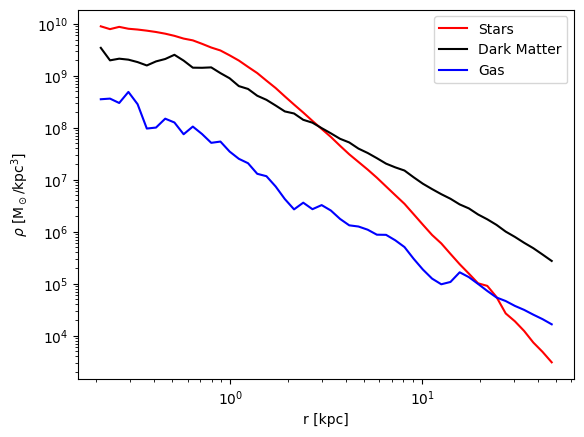

In [17]:
pylab.plot(star_profile['rbins'], star_profile['density'], 'r', label='Stars')
pylab.plot(dm_profile['rbins'], dm_profile['density'], 'k', label='Dark Matter')
pylab.plot(gas_profile['rbins'], gas_profile['density'], 'b', label='Gas')
pylab.loglog()
pylab.xlabel('r [kpc]')
pylab.ylabel(r'$\rho$ [M$_\odot$/kpc$^3$]')
pylab.legend()

### Histograms, 2D histograms, and derived arrays

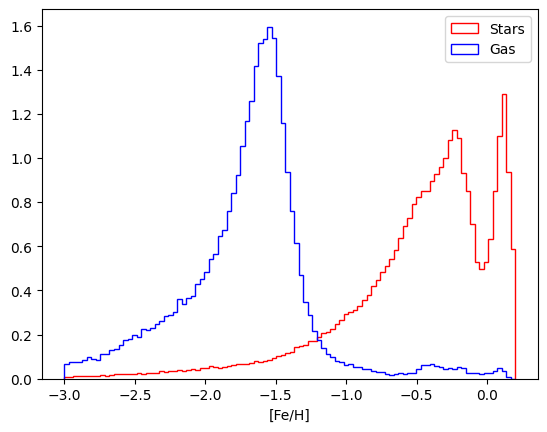

In [18]:
pylab.hist(main_halo.s['feh'], bins=100, histtype='step', color='r', label='Stars', range=(-3.0, 0.2), density=True)
pylab.hist(main_halo.g['feh'], bins=100, histtype='step', color='b', label='Gas', range=(-3.0, 0.2), density=True)
pylab.xlabel("[Fe/H]")
pylab.legend()

Text(0, 0.5, '[O/Fe]')

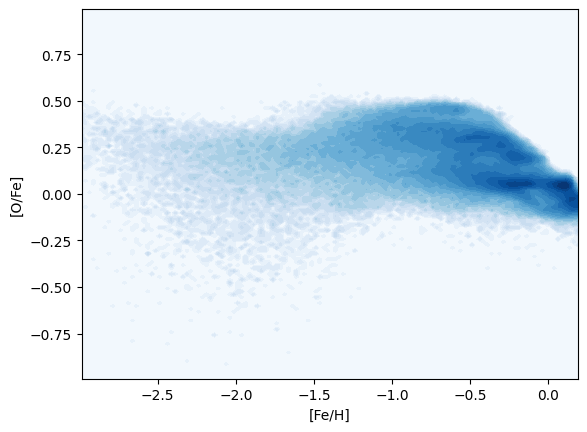

In [19]:
pynbody.plot.hist2d(main_halo.s['feh'], main_halo.s['ofe'], logscale=True, cmap='Blues', nbins=128,
                    x_range=(-3, 0.2), y_range=(-1, 1))
pylab.xlabel("[Fe/H]")
pylab.ylabel("[O/Fe]")

In [ ]:
main_halo.s.is_derived_array('feh') # also ofe

True

In [ ]:
help(main_halo.s.find_deriving_function('feh'))

Help on function ofe in module pynbody.snapshot.tipsy:

ofe(self)
    Derived [TipsySnap]: Oxygen-to-iron ratio [O/Fe] derived from tipsy arrays OxMassFrac and FeMassFrac
    with solar values from Asplund et al 09



/opt/homebrew/anaconda3/envs/grinnell/lib/python3.11/site-packages/pynbody/plot/generic.py:469: UserWarning: The following kwargs were not used by contour: 'xlabel', 'ylabel'
  plot_artist = plt.contourf(


(array([[1., 1., 1., ..., 1., 3., 2.],
        [1., 1., 1., ..., 5., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]], shape=(100, 100)),
 array([1.81563409, 1.8892105 , 1.96278691, 2.03636332, 2.10993972,
        2.18351613, 2.25709254, 2.33066895, 2.40424536, 2.47782177,
        2.55139818, 2.62497458, 2.69855099, 2.7721274 , 2.84570381,
        2.91928022, 2.99285663, 3.06643304, 3.14000944, 3.21358585,
        3.28716226, 3.36073867, 3.43431508, 3.50789149, 3.5814679 ,
        3.6550443 , 3.72862071, 3.80219712, 3.87577353, 3.94934994,
        4.02292635, 4.09650276, 4.17007916, 4.24365557, 4.31723198,
        4.39080839, 4.4643848 , 4.53796121, 4.61153762, 4.68511402,
        4.75869043, 4.83226684, 4.90584325, 4.97941966, 5.05299607,
        5.12657248, 5.20014888, 5.27372529, 5.3473017 , 5.42087811,
        5.49445452, 5.56803093, 5.64160734, 5.7151837

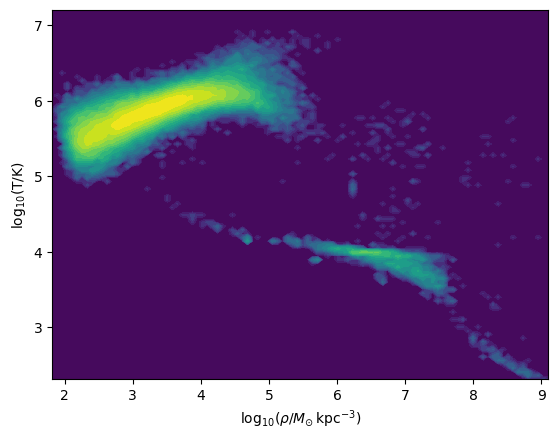

In [22]:
pynbody.plot.gas.rho_T(main_halo.g)

## Profiles

In [24]:
import pynbody;
from pynbody.analysis import profile;
import matplotlib.pylab as plt

s = pynbody.load('testdata/gasoline_ahf/g15784.lr.01024')
s.physical_units()
h = s.halos()
pynbody.analysis.faceon(h[0])

pynbody.halo : Unable to load AHF substructure file; continuing without. To expose the underlying problem as an exception, pass ignore_missing_substructure=False to the AHFCatalogue constructor


<Transformation faceon>

In [25]:
p = profile.Profile( h[0].star, rmin = '.05 kpc', rmax = '50 kpc') # binned profile, extension of SimSnap, rmin/rmax can be float or string with units

[]

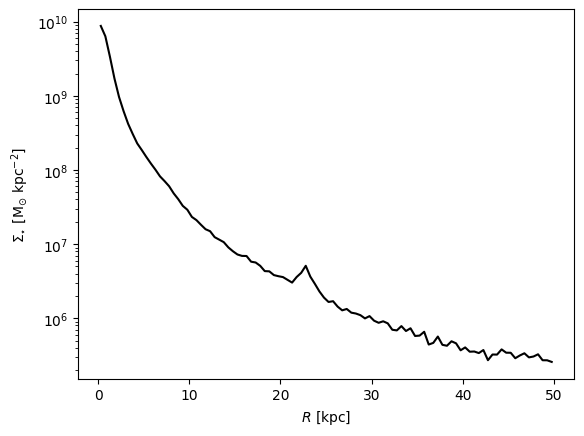

In [26]:
plt.plot(p['rbins'].in_units('kpc'),p['density'].in_units('Msol kpc^-2'),'k')
plt.xlabel('$R$ [kpc]')
plt.ylabel(r'$\Sigma_{\star}$ [M$_{\odot}$ kpc$^{-2}$]')
plt.semilogy()

[]

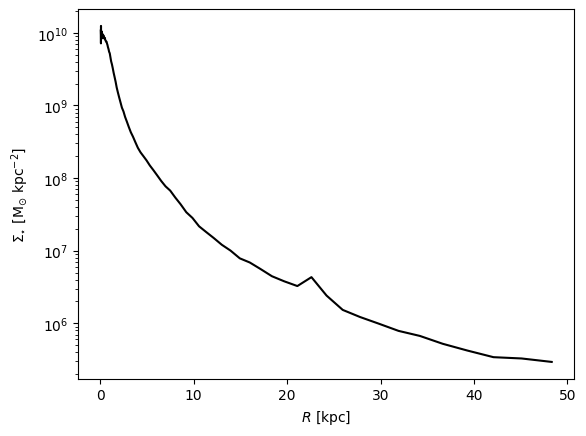

In [ ]:
p = profile.Profile( h[0].star, rmin = '.05 kpc', rmax = '50 kpc', type='log') # logarithmic binning, type can also be 'linear' or 'logarithmic'
plt.plot(p['rbins'].in_units('kpc'),p['density'].in_units('Msol kpc^-2'),'k')
plt.xlabel('$R$ [kpc]'); \
plt.ylabel(r'$\Sigma_{\star}$ [M$_{\odot}$ kpc$^{-2}$]'); \
plt.semilogy()

In [29]:
pdm_3d = profile.Profile(s.dm, rmin = '.01 kpc', rmax = '500 kpc', ndim = 3)

[]

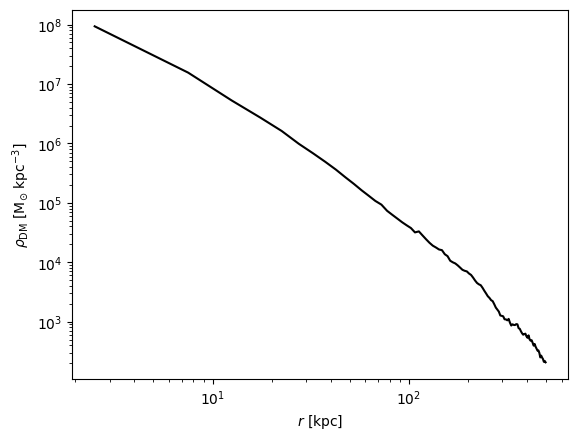

In [30]:
plt.plot(pdm_3d['rbins'].in_units('kpc'),pdm_3d['density'].in_units('Msol kpc^-3'),'k')
plt.xlabel('$r$ [kpc]'); plt.ylabel(r'$\rho_{\rm DM}$ [M$_{\odot}$ kpc$^{-3}$]'); plt.loglog()

### Mass-weighted average quantities

Text(0, 0.5, '[Fe/H]')

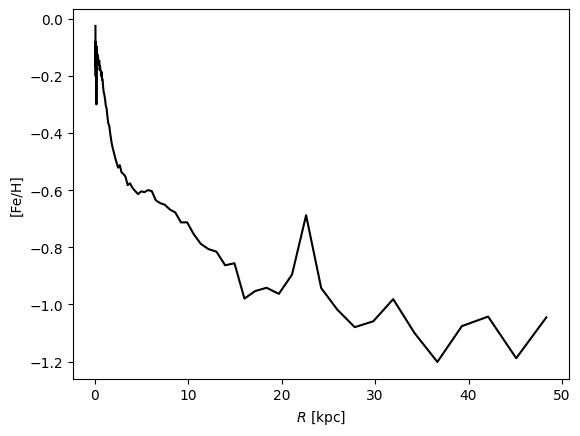

In [31]:
plt.plot(p['rbins'].in_units('kpc'),p['feh'],'k')
plt.xlabel('$R$ [kpc]'); plt.ylabel('[Fe/H]')

### Special quantities

Text(0, 0.5, '$M_{\\star}(<R)$')

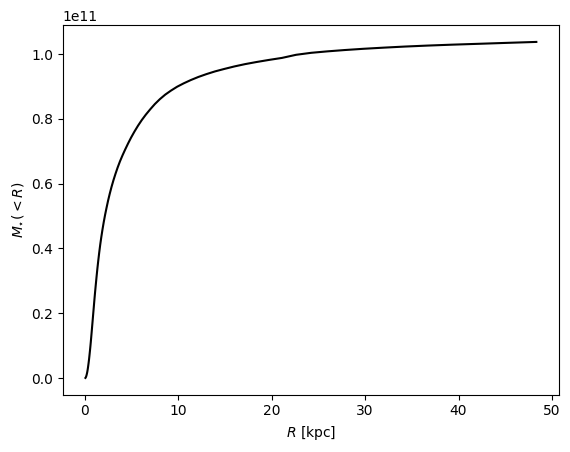

In [ ]:
plt.plot(p['rbins'].in_units('kpc'), p['mass_enc'], 'k') # special, mass enclosed in sphere of radius R
# pynbody.analysis.profile.Profile.derivable_keys()
plt.xlabel('$R$ [kpc]'); plt.ylabel(r'$M_{\star}(<R)$')

### Surface brightnesses

/opt/homebrew/anaconda3/envs/grinnell/lib/python3.11/site-packages/pynbody/snapshot/tipsy.py:1224: UserWarning: No log file found, so the precise structure of the starlog is not defined; reverting to guess-and-check
  warnings.warn('No log file found, so the precise structure of the starlog is not defined; reverting to guess-and-check')


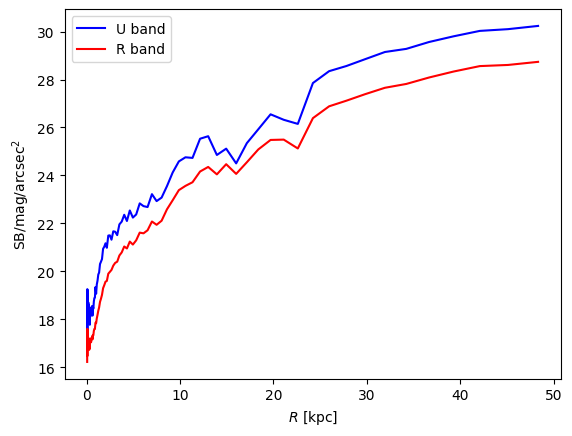

In [33]:
plt.plot(p['rbins'].in_units('kpc'), p['sb,u'], 'b', label="U band");
plt.plot(p['rbins'].in_units('kpc'), p['sb,r'], 'r', label="R band");

plt.xlabel('$R$ [kpc]'); plt.ylabel(r'SB/mag/arcsec$^2$');
plt.legend()

### Rotation curves

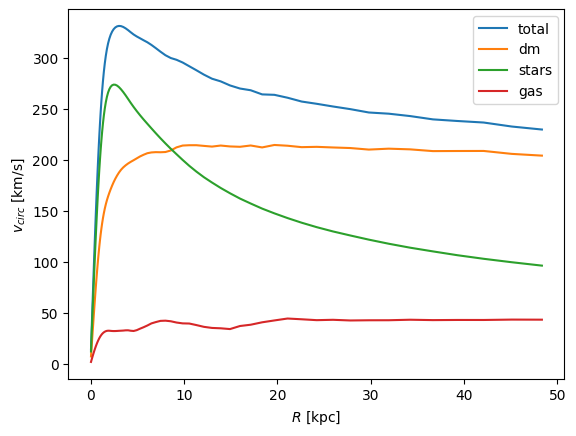

In [34]:
p_dm = pynbody.analysis.profile.Profile(h[0].dm, min=.05, max=50, type = 'log')
p_gas = pynbody.analysis.profile.Profile(h[0].gas, min=.05, max=50, type = 'log')
p_all = pynbody.analysis.profile.Profile(h[0], min=.05, max=50, type = 'log')
for prof, name in zip([p_all, p_dm, p, p_gas],['total', 'dm', 'stars', 'gas']):
    plt.plot(prof['rbins'], prof['v_circ'], label=name)

plt.xlabel('$R$ [kpc]');
plt.ylabel('$v_{circ}$ [km/s]');
plt.legend()

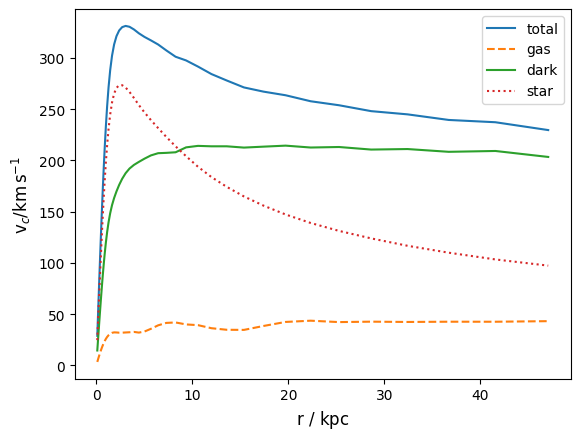

In [35]:
pynbody.plot.profile.rotation_curve(h[0], parts=True, rmin=0.1, rmax=50.0)
plt.legend()

### Calculating Derivatives and Dispersions

In [36]:
p_all = profile.Profile(s, rmin='.01 kpc', rmax='250 kpc')
p_all['pot'][0:10] # returns the potential profile
p_all['d_pot'][0:10] # returns d phi / dr from p["phi"]

/opt/homebrew/anaconda3/envs/grinnell/lib/python3.11/site-packages/pynbody/analysis/profile.py:727: UserWarning: Profile pot -- this routine assumes the disk is in the x-y plane
  warnings.warn("Profile pot -- this routine assumes the disk is in the x-y plane")


array([Unit("4.35e+04 kpc**-1"), Unit("3.23e+04 kpc**-1"),
       Unit("1.69e+04 kpc**-1"), Unit("1.07e+04 kpc**-1"),
       Unit("7.55e+03 kpc**-1"), Unit("5.68e+03 kpc**-1"),
       Unit("4.53e+03 kpc**-1"), Unit("3.77e+03 kpc**-1"),
       Unit("3.20e+03 kpc**-1"), Unit("2.77e+03 kpc**-1")], dtype=object)

Text(0, 0.5, '$\\sigma_{r}$')

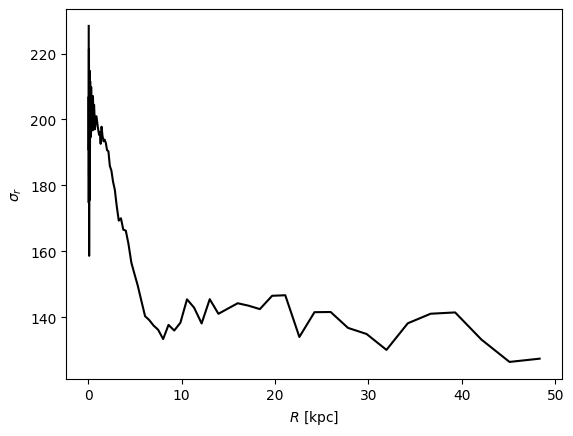

In [37]:
plt.plot(p['rbins'].in_units('kpc'), p['vr_disp'].in_units('km s^-1'), 'k')
plt.xlabel('$R$ [kpc]'); \
plt.ylabel('$\sigma_{r}$')

Text(0, 0.5, '[Fe/H]')

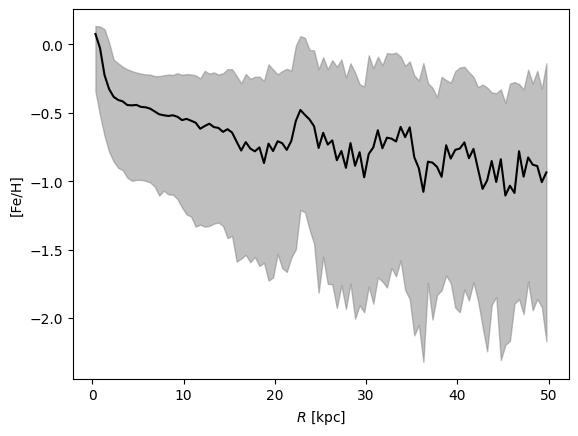

In [38]:
p_quant = profile.QuantileProfile( h[0].s, rmin = '0.1 kpc', rmax = '50 kpc')
plt.clf(); plt.plot(p_quant['rbins'], p_quant['feh'][:,1], 'k')
plt.fill_between(p_quant['rbins'], p_quant['feh'][:,0], p_quant['feh'][:,2], color = 'Grey', alpha=0.5)
plt.xlabel('$R$ [kpc]'); plt.ylabel('[Fe/H]')

### Vertical Profiles

Text(0, 0.5, '$\\rho_{\\star}$ [M$_{\\odot}$ pc$^{-3}$]')

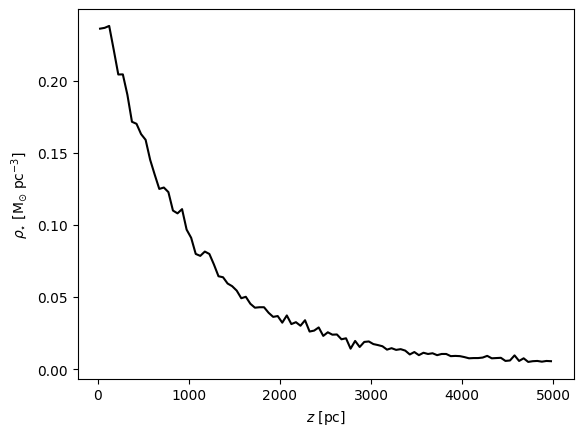

In [39]:
p_vert = profile.VerticalProfile( h[0].s, '3 kpc', '5 kpc', '5 kpc')
plt.clf(); plt.plot(p_vert['rbins'].in_units('pc'), p_vert['density'].in_units('Msol pc^-3'),'k')
plt.xlabel('$z$ [pc]'); plt.ylabel(r'$\rho_{\star}$ [M$_{\odot}$ pc$^{-3}$]')

### Profiles with arbitrary x-axes

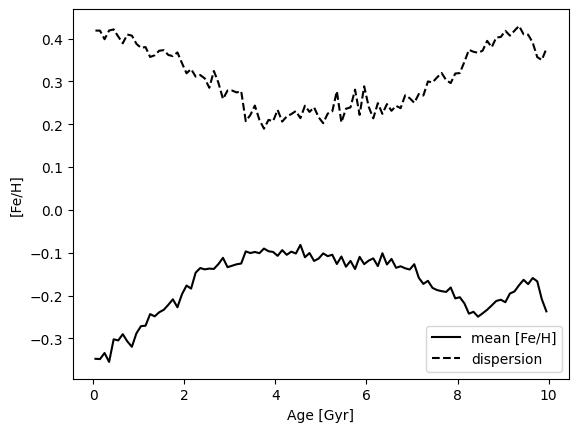

In [40]:
s.s['age'].convert_units('Gyr')
p_age = profile.Profile( h[0].s,
                         calc_x = lambda x: x.s['age'],
                         rmax = '10 Gyr' )

plt.clf(); plt.plot(p_age['rbins'], p_age['feh'], 'k', label = 'mean [Fe/H]')
plt.plot(p_age['rbins'], p_age['feh_disp'], 'k--', label = 'dispersion')
plt.xlabel('Age [Gyr]'); plt.ylabel('[Fe/H]')
plt.legend()